Below code shows all operators in a single diagram. All kernels are of 5x5 size. Depth of output image is passed -1 to get the result in np.uint8 type.

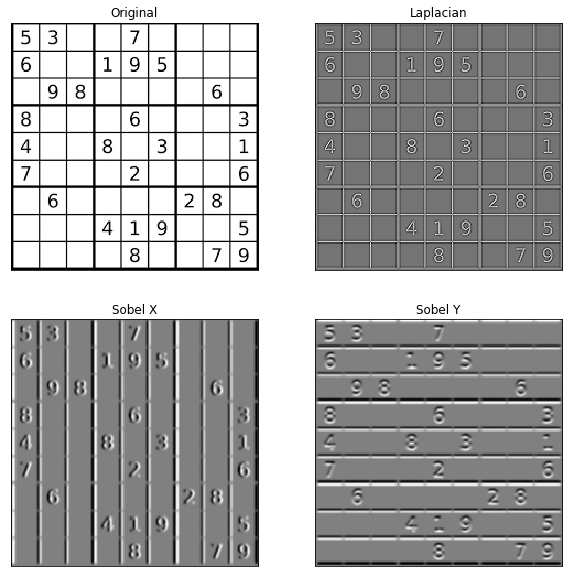

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('files/fig/index.png',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

Same with different Ksize
Note that Kernal size must be odd and less than 31

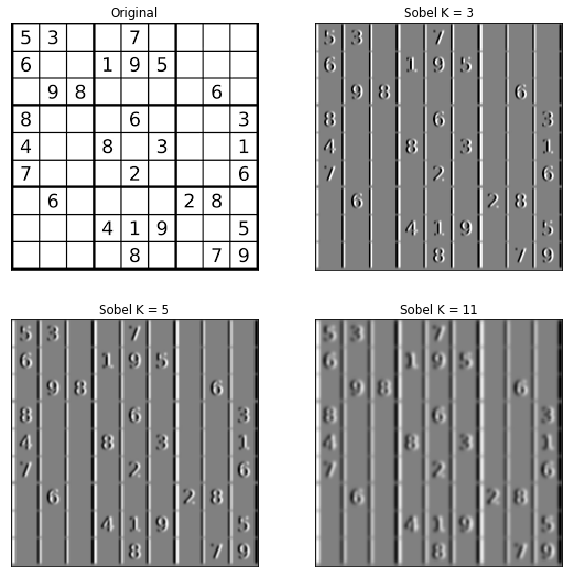

In [13]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobel1 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobel2 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=11)
sobel3 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobel3,cmap = 'gray')
plt.title('Sobel K = 3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobel1,cmap = 'gray')
plt.title('Sobel K = 5'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobel2,cmap = 'gray')
plt.title('Sobel K = 11'), plt.xticks([]), plt.yticks([])

plt.show()

Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

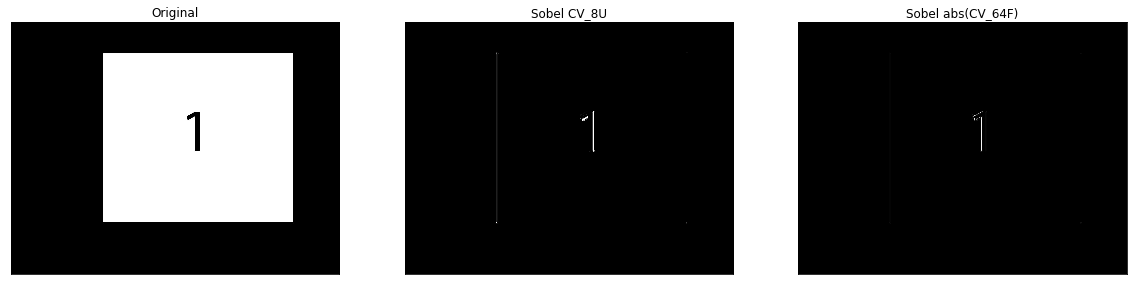

In [19]:
img = cv2.imread('files/fig/box.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()